In [1]:
using Compat, Random, Distributions, Plots, LinearAlgebra, Statistics, LaTeXStrings, SparseArrays, CPUTime, JLD2
using SpecialFunctions, GSL, SuiteSparse, Distributed, Roots, NBInclude
gr(fmt=:png)
e = 2.7182818284
@nbinclude("setup.ipynb")
Random.seed!(1);

float first-quarter consumption responses by sector by elasticity:
cT: -0.11 cN: -0.31
high - cT: -0.17 cN: -0.31
low  - cT: -0.05 cN: -0.31
peg first-quarter consumption responses by sector by elasticity:
cT: -0.27 cN: -0.52
high - cT: -0.41 cN: -0.57
low  - cT: -0.1 cN: -0.48


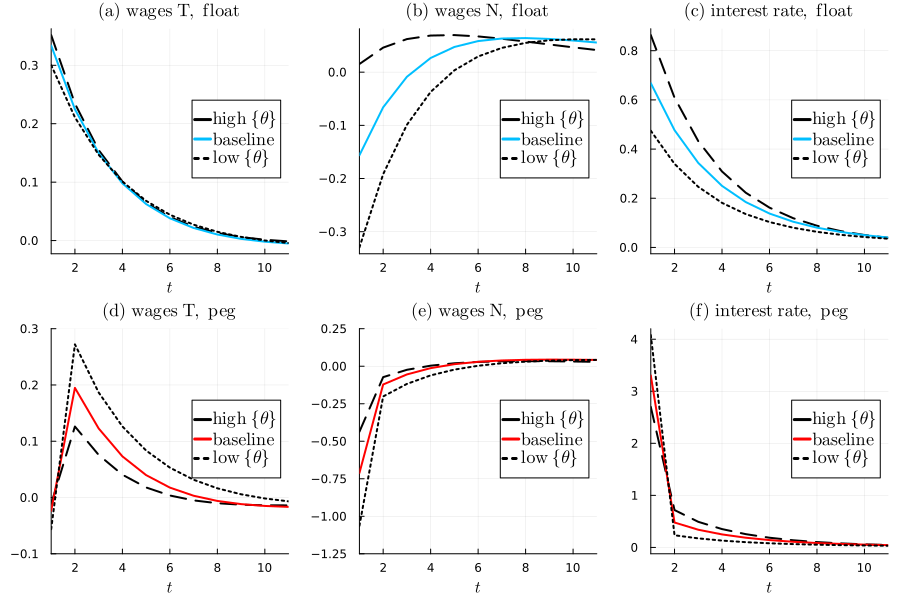

In [3]:
# set the time grid
T = 600
dt = T/1200
T_bar = 24
time_grid = collect(0:dt:T)
L = length(time_grid)
ψ = 0.02/12*exp.(-time_grid/12*1.15)

# set up matrices that convert monthly responses to quarterly
Lq = Int64((L-1)/8)
A = Diagonal(ones(Lq))
b = ones(8)'/8
Q = hcat(kron(A,b),zeros(Lq))
Tq_bar = 11
tq_grid = time_grid[9:8:end]/4

# load parameters
@load "steady_state_output.jld2"

# plot IRF
@load "transition_results/float.jld2"
wT_float = res_this.wT_sequence
wN_float = res_this.wN_sequence
r_float = res_this.rd_sequence
P_float = exp.(cumsum(vcat(0,res_this.π_sequence[1:end-1]) * dt))
E_float = P_float.*res_this.pF_sequence

print("\e[34mfloat\e[0m first-quarter consumption responses by sector by elasticity:\n")
print("cT: ",round(100*(Q*res_this.cT_sequence/res_this.cT_sequence[end]-ones(Lq))[1],digits=2)," cN: ",round(100*(Q*res_this.cN_sequence/res_this.cN_sequence[end]-ones(Lq))[1],digits=2),"\n")

@load "transition_results/float_high_elast.jld2"
wT_float_high = res_this.wT_sequence
wN_float_high = res_this.wN_sequence
r_float_high = res_this.rd_sequence
P_float_high = exp.(cumsum(vcat(0,res_this.π_sequence[1:end-1]) * dt))
E_float_high = P_float_high.*res_this.pF_sequence

print("high - ")
print("cT: ",round(100*(Q*res_this.cT_sequence/res_this.cT_sequence[end]-ones(Lq))[1],digits=2)," cN: ",round(100*(Q*res_this.cN_sequence/res_this.cN_sequence[end]-ones(Lq))[1],digits=2),"\n")

@load "transition_results/float_low_elast.jld2"
wT_float_low = res_this.wT_sequence
wN_float_low = res_this.wN_sequence
r_float_low = res_this.rd_sequence
P_float_low = exp.(cumsum(vcat(0,res_this.π_sequence[1:end-1]) * dt))
E_float_low = P_float_low.*res_this.pF_sequence

print("low  - ")
print("cT: ",round(100*(Q*res_this.cT_sequence/res_this.cT_sequence[end]-ones(Lq))[1],digits=2)," cN: ",round(100*(Q*res_this.cN_sequence/res_this.cN_sequence[end]-ones(Lq))[1],digits=2),"\n")

plot_wT_float = plot(tq_grid,100*(Q*wT_float_high-ones(Lq)),xlim=[1,Tq_bar],color=:black,lw=2,ls=:dash,label=L"\mathrm{high\ }\{\theta\}")
plot!(tq_grid,100*(Q*wT_float-ones(Lq)),xlim=[1,Tq_bar],color=:deepskyblue,lw=2,label=L"\mathrm{baseline}",legend=:bottomright,title=L"\mathrm{(a)\ wages\ T,\ float}")
plot!(tq_grid,100*(Q*wT_float_low-ones(Lq)),xlim=[1,Tq_bar],color=:black,lw=2,ls=:dot,label=L"\mathrm{low\ }\{\theta\}")
plot_wN_float = plot(tq_grid,100*(Q*wN_float_high-ones(Lq)),xlim=[1,Tq_bar],color=:black,lw=2,ls=:dash,label=L"\mathrm{high\ }\{\theta\}")
plot!(tq_grid,100*(Q*wN_float-ones(Lq)),xlim=[1,Tq_bar],color=:deepskyblue,lw=2,label=L"\mathrm{baseline}",legend=:bottomright,title=L"\mathrm{(b)\ wages\ N,\ float}")
plot!(tq_grid,100*(Q*wN_float_low-ones(Lq)),xlim=[1,Tq_bar],color=:black,lw=2,ls=:dot,label=L"\mathrm{low\ }\{\theta\}")
plot_r_float = plot(tq_grid,12*100*(Q*r_float_high-par.r_d*ones(Lq)),xlim=[1,Tq_bar],color=:black,lw=2,ls=:dash,label=L"\mathrm{high\ }\{\theta\}")
plot!(tq_grid,12*100*(Q*r_float-par.r_d*ones(Lq)),xlim=[1,Tq_bar],color=:deepskyblue,lw=2,label=L"\mathrm{baseline}",legend=:bottomright,title=L"\mathrm{(c)\ interest\ rate,\ float}")
plot!(tq_grid,12*100*(Q*r_float_low-par.r_d*ones(Lq)),xlim=[1,Tq_bar],color=:black,lw=2,ls=:dot,label=L"\mathrm{low\ }\{\theta\}")
plot_E_float = plot(tq_grid,100*(Q*E_float-ones(Lq)),xlim=[1,Tq_bar],color=:black,lw=2,ls=:dash,label=L"\mathrm{high\ }\{\theta\}")
plot!(tq_grid,100*(Q*E_float_high-ones(Lq)),xlim=[1,Tq_bar],color=:deepskyblue,lw=2,label=L"\mathrm{baseline}",legend=:bottomright,title=L"\mathrm{(c)\ exchange\ rate,\ float}")
plot!(tq_grid,100*(Q*E_float_low-ones(Lq)),xlim=[1,Tq_bar],color=:black,lw=2,ls=:dot,label=L"\mathrm{low\ }\{\theta\}")

@load "transition_results/peg.jld2"
wT_peg = res_this.wT_sequence
wN_peg = res_this.wN_sequence
r_peg = res_this.rd_sequence
P_peg = exp.(cumsum(vcat(0,res_this.π_sequence[1:end-1]) * dt))
E_peg = P_peg.*res_this.pF_sequence

print("\e[91mpeg\e[0m first-quarter consumption responses by sector by elasticity:\n")
print("cT: ",round(100*(Q*res_this.cT_sequence/res_this.cT_sequence[end]-ones(Lq))[1],digits=2)," cN: ",round(100*(Q*res_this.cN_sequence/res_this.cN_sequence[end]-ones(Lq))[1],digits=2),"\n")

@load "transition_results/peg_high_elast.jld2"
wT_peg_high = res_this.wT_sequence
wN_peg_high = res_this.wN_sequence
r_peg_high = res_this.rd_sequence
P_peg_high = exp.(cumsum(vcat(0,res_this.π_sequence[1:end-1]) * dt))
E_peg_high = P_peg_high.*res_this.pF_sequence

print("high - ")
print("cT: ",round(100*(Q*res_this.cT_sequence/res_this.cT_sequence[end]-ones(Lq))[1],digits=2)," cN: ",round(100*(Q*res_this.cN_sequence/res_this.cN_sequence[end]-ones(Lq))[1],digits=2),"\n")

@load "transition_results/peg_low_elast.jld2"
wT_peg_low = res_this.wT_sequence
wN_peg_low = res_this.wN_sequence
r_peg_low = res_this.rd_sequence
P_peg_low = exp.(cumsum(vcat(0,res_this.π_sequence[1:end-1]) * dt))
E_peg_low = P_peg_low.*res_this.pF_sequence

print("low  - ")
print("cT: ",round(100*(Q*res_this.cT_sequence/res_this.cT_sequence[end]-ones(Lq))[1],digits=2)," cN: ",round(100*(Q*res_this.cN_sequence/res_this.cN_sequence[end]-ones(Lq))[1],digits=2),"\n")

plot_wT_peg = plot(tq_grid,100*(Q*wT_peg_high-ones(Lq)),xlim=[1,Tq_bar],color=:black,lw=2,ls=:dash,label=L"\mathrm{high\ }\{\theta\}",ylim=[-0.1,0.3])
plot!(tq_grid,100*(Q*wT_peg-ones(Lq)),xlim=[1,Tq_bar],color=:red,lw=2,label=L"\mathrm{baseline}",legend=:bottomright,title=L"\mathrm{(d)\ wages\ T,\ peg}")
plot!(tq_grid,100*(Q*wT_peg_low-ones(Lq)),xlim=[1,Tq_bar],color=:black,lw=2,ls=:dot,label=L"\mathrm{low\ }\{\theta\}")
plot_wN_peg = plot(tq_grid,100*(Q*wN_peg_high-ones(Lq)),xlim=[1,Tq_bar],color=:black,lw=2,ls=:dash,label=L"\mathrm{high\ }\{\theta\}",ylim=[-1.25,0.25])
plot!(tq_grid,100*(Q*wN_peg-ones(Lq)),xlim=[1,Tq_bar],color=:red,lw=2,label=L"\mathrm{baseline}",legend=:bottomright,title=L"\mathrm{(e)\ wages\ N,\ peg}")
plot!(tq_grid,100*(Q*wN_peg_low-ones(Lq)),xlim=[1,Tq_bar],color=:black,lw=2,ls=:dot,label=L"\mathrm{low\ }\{\theta\}")
plot_r_peg = plot(tq_grid,12*100*(Q*r_peg_high-par.r_d*ones(Lq)),xlim=[1,Tq_bar],color=:black,lw=2,ls=:dash,label=L"\mathrm{high\ }\{\theta\}")
plot!(tq_grid,12*100*(Q*r_peg-par.r_d*ones(Lq)),xlim=[1,Tq_bar],color=:red,lw=2,label=L"\mathrm{baseline}",legend=:bottomright,title=L"\mathrm{(f)\ interest\ rate,\ peg}")
plot!(tq_grid,12*100*(Q*r_peg_low-par.r_d*ones(Lq)),xlim=[1,Tq_bar],color=:black,lw=2,ls=:dot,label=L"\mathrm{low\ }\{\theta\}")


l = @layout[a a a; a a a]
plot(plot_wT_float,plot_wN_float,plot_r_float,plot_wT_peg,plot_wN_peg,plot_r_peg,layout=l,size=(900,600),legendfontsize=12,titlefontsize=12,legend=:right,xlabel=L"t")

In [4]:
png("graphs/elasticities_IRF.png")

"graphs/elasticities_IRF.png"